In [0]:
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers , models

In [0]:
%tensorflow_version 2.x 

In [0]:
Cifar  = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = Cifar.load_data()

(50000, 32, 32, 3)


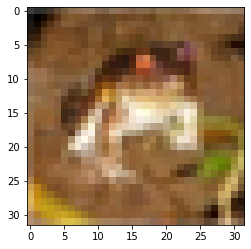

In [4]:
print(train_images.shape)
plt.imshow(train_images[0])


In [0]:
train_images = train_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255
train_labels = train_labels.reshape((-1,)).astype(np.int32)

test_images = test_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255
test_labels = test_labels.reshape((-1,)).astype(np.int32)

(50000, 32, 32, 3)


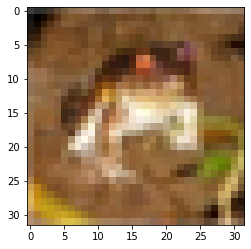

In [6]:
print(train_images.shape)
plt.imshow(train_images[0])

In [0]:
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels)) #Converting the data into tensors to pass it to the sequential model
train_data = train_data.shuffle(buffer_size=60000).batch(200).repeat()

test_data = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_data = test_data.batch(200)

In [9]:
train_steps = 500 
inputs = keras.Input(shape=(32,32,3))
inputs.shape


TensorShape([None, 32, 32, 3])

**Hyper Parameter Tuning :
Dense Block 1 & 2 : Filter - 1,1,3,5 
                    Max Pool 3 , Strides 1 (y)
                    Channels :32 
Epochs :2
steps :50**

In [10]:
# Dense Block 1 

convolution_layer_1 = layers.Conv2D(32 ,1 ,strides=1, activation='relu', padding='same')(inputs)#Bottlenecklayer
convolution_layer_2 = layers.Conv2D(32 ,1 ,strides=1, activation='relu', padding='same')(inputs)
convolution_layer_3 = layers.Conv2D(32 ,3 ,strides=1, activation='relu', padding='same')(inputs)
convolution_layer_4 = layers.Conv2D(32 ,5  , strides=1,activation='relu', padding='same')(inputs)
print(convolution_layer_3.shape)

Dense_Block1 = layers.MaxPool2D(pool_size=(3,3),strides=1,padding='same')(inputs) 
print(Dense_Block1.shape)
concatenate_block = tf.keras.layers.concatenate([convolution_layer_1,convolution_layer_2,convolution_layer_3,convolution_layer_4,Dense_Block1])



#Dense Block 2

convolution_layer_5 = layers.Conv2D(32 , 1 , strides=1,activation='relu', padding='same')(concatenate_block)##Bottlenecklayer
convolution_layer_6 = layers.Conv2D(32 , 1 ,strides=1, activation='relu', padding='same')(concatenate_block)
convolution_layer_7 = layers.Conv2D(32 ,3 ,strides=1, activation='relu', padding='same')(concatenate_block)
convolution_layer_8 = layers.Conv2D(32 , 5 , strides=1,activation='relu', padding='same')(concatenate_block)
Dense_Block2 = layers.MaxPool2D(pool_size=(3,3),strides = 1 ,padding='same')(concatenate_block)

concatenate_block1 = tf.keras.layers.concatenate([convolution_layer_5,convolution_layer_6,convolution_layer_7,convolution_layer_8,Dense_Block2])
Dense_Block2.shape


(None, 32, 32, 32)
(None, 32, 32, 3)


TensorShape([None, 32, 32, 131])

In [0]:
Flatten = layers.Flatten()(concatenate_block1)
output = layers.Dense(10)(Flatten)
model = tf.keras.Model(inputs, output)

In [12]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 32)   128         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   128         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   896         input_2[0][0]                    
______________________________________________________________________________________________

In [0]:
loss_func= tf.losses.SparseCategoricalCrossentropy(from_logits=True)
train_acc_metric = tf.metrics.SparseCategoricalAccuracy()
optimimzer = tf.optimizers.Adam()


In [0]:
model.compile(optimizer=optimimzer,loss=loss_func,metrics= train_acc_metric)

In [15]:
model.fit(train_data,epochs=2,steps_per_epoch=100)

Epoch 1/2
100/100 [==============================] - 806s 8s/step - loss: 4.5553 - sparse_categorical_accuracy: 0.2998
Epoch 2/2
100/100 [==============================] - 793s 8s/step - loss: 1.4036 - sparse_categorical_accuracy: 0.5052


In [16]:
model.evaluate(test_data)

50/50 [==============================] - 75s 2s/step - loss: 1.2939 - sparse_categorical_accuracy: 0.5380


[1.293902039527893, 0.5379999876022339]

**Hyper Parameter Tuning :
Dense Block 1 & 2 : Filter - 1,2,3,5 
                    Max Pool 1 , Strides 1 (y)
                    Channels :32 
Epochs :4**


In [0]:


#DenseBlock1
convolution_layer_8 = layers.Conv2D(32 , kernel_size=1 , activation='relu', padding='same')(inputs)#Bottlenecklayer
convolution_layer_9 = layers.Conv2D(32 , kernel_size=2 , activation='relu', padding='same')(inputs)
convolution_layer_10 = layers.Conv2D(32 , kernel_size=2 , activation='relu', padding='same')(inputs)
convolution_layer_11 = layers.Conv2D(32 , kernel_size=5  ,  activation='relu', padding='same')(inputs)
Dense_Block11 = layers.MaxPool2D(pool_size=(1,1),strides=1, padding='same')(inputs) 

concatenate_block2 = tf.keras.layers.concatenate([convolution_layer_8,convolution_layer_9,convolution_layer_10,convolution_layer_11,Dense_Block11])



#Dense Block2
convolution_layer_12 = layers.Conv2D(32 , kernel_size=1 , activation='relu', padding='same')(concatenate_block2)##Bottlenecklayer
convolution_layer_13 = layers.Conv2D(32 , kernel_size=2 , activation='relu', padding='same')(concatenate_block2)
convolution_layer_14 = layers.Conv2D(32 , kernel_size=2 , activation='relu', padding='same')(concatenate_block2)
convolution_layer_15 = layers.Conv2D(32 , kernel_size=5 , activation='relu', padding='same')(concatenate_block2)
Dense_Block12 = layers.MaxPool2D(pool_size=(1,1), strides=1,padding='same')(concatenate_block2)

concatenate_block3 = tf.keras.layers.concatenate([convolution_layer_12,convolution_layer_13,convolution_layer_14,Dense_Block12])



Flatten = layers.Flatten()(concatenate_block3)
output1 = layers.Dense(10)(Flatten)

model1 = tf.keras.Model(inputs, output1)


In [0]:
model1.compile(optimizer=optimimzer,loss=loss_func,metrics= train_acc_metric)

In [20]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 32, 32, 32)   128         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 32, 32, 32)   416         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 32, 32, 32)   416         input_2[0][0]                    
____________________________________________________________________________________________

In [245]:
model1.fit(train_data,epochs=4,steps_per_epoch=100)

Epoch 1/4
100/100 [==============================] - 251s 3s/step - loss: 6.1848 - sparse_categorical_accuracy: 0.3575
Epoch 2/4
100/100 [==============================] - 250s 3s/step - loss: 1.5620 - sparse_categorical_accuracy: 0.4523
Epoch 3/4
100/100 [==============================] - 251s 3s/step - loss: 1.4318 - sparse_categorical_accuracy: 0.4944
Epoch 4/4
100/100 [==============================] - 250s 2s/step - loss: 1.3553 - sparse_categorical_accuracy: 0.5225


In [246]:
model1.evaluate(test_data)

50/50 [==============================] - 29s 578ms/step - loss: 1.3684 - sparse_categorical_accuracy: 0.5108


[1.3684258460998535, 0.5108000040054321]